# Preprocessing Notebook

In [14]:
import os
import sys
sys.path.append('..')


import src.config as config
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
im_files_circles = [config.CIRCLES  +  im_circ for im_circ in os.listdir(config.CIRCLES)]
im_files_squares = [config.SQUARES  +  im_squer for im_squer in os.listdir(config.SQUARES)]
im_files_triangles = [config.TRIANGLES  +  im_tria for im_tria in os.listdir(config.TRIANGLES)]

In [16]:
im_files_circles

['../input/shapes/circles/drawing(54).png',
 '../input/shapes/circles/drawing(56).png',
 '../input/shapes/circles/drawing(67).png',
 '../input/shapes/circles/drawing(5).png',
 '../input/shapes/circles/drawing(48).png',
 '../input/shapes/circles/drawing(87).png',
 '../input/shapes/circles/drawing(8).png',
 '../input/shapes/circles/drawing(14).png',
 '../input/shapes/circles/drawing(72).png',
 '../input/shapes/circles/drawing(9).png',
 '../input/shapes/circles/drawing(43).png',
 '../input/shapes/circles/drawing(99).png',
 '../input/shapes/circles/drawing(39).png',
 '../input/shapes/circles/drawing(79).png',
 '../input/shapes/circles/drawing(45).png',
 '../input/shapes/circles/drawing(94).png',
 '../input/shapes/circles/drawing(34).png',
 '../input/shapes/circles/drawing(47).png',
 '../input/shapes/circles/drawing(57).png',
 '../input/shapes/circles/drawing(12).png',
 '../input/shapes/circles/drawing(36).png',
 '../input/shapes/circles/drawing(92).png',
 '../input/shapes/circles/drawing(6

In [17]:
images_plt_circles = [plt.imread(f) for f in im_files_circles]
images_plt_squares = [plt.imread(f) for f in im_files_squares]
images_plt_triangles = [plt.imread(f) for f in im_files_triangles]

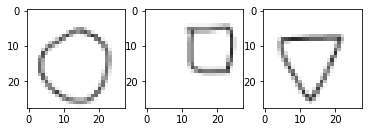

In [24]:
plt.figure(1)
plt.subplot(131)
plt.imshow(images_plt_circles[1])
plt.subplot(132)
plt.imshow(images_plt_squares[1])
plt.subplot(133)
plt.imshow(images_plt_triangles[1])

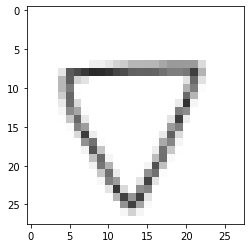

In [7]:
plt.imshow(images_plt_triangles[1])

In [8]:
images_circles = np.array(images_plt_circles)

In [9]:
images_circles[1].shape

(28, 28, 3)

In [10]:
def make_padding(image):
    b1 = np.ones((8,28,3))
    b2 = np.ones((44,8,3))
    rect = np.concatenate(
        (np.concatenate((b1,image),axis = 0),b1),
        axis = 0
        )
    padd_image = np.concatenate(
        (np.concatenate((b2,rect),axis = 1),b2),
        axis = 1
        )
    return padd_image

In [11]:
padd = make_padding(images_circles[1])

In [12]:
padd.shape

(44, 44, 3)

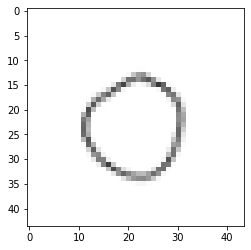

In [13]:
plt.imshow(padd)

In [14]:
images_squares = np.array(images_plt_squares)
images_triangles = np.array(images_plt_triangles)

In [15]:
circles = [np.array(make_padding(circ)) for circ in images_circles]
squares = [np.array(make_padding(sque)) for sque in images_squares]
triangles = [np.array(make_padding(tri)) for tri in images_triangles]

In [16]:
circles[1].shape

(44, 44, 3)

In [17]:
def image_to_vector(image: np.ndarray) -> np.ndarray:
    """
    Args:
    image: numpy array of shape (length, height, depth)

    Returns:
     v: a vector of shape (length x height x depth, 1)
    """
    length, height, depth = image.shape
    return image.reshape((length * height * depth, 1))

In [18]:
image_to_vector(circles[1])

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [19]:
circles_1D = np.array(
    [image_to_vector(c) for c in circles]
    )

triangles_1D = np.array(
    [image_to_vector(t) for t in triangles]
    )

squares_1D = np.array(
    [image_to_vector(s) for s in squares]
    )

In [20]:
circles_1D.shape

(100, 5808, 1)

In [21]:
import pandas as pd
df_circles = pd.DataFrame(data=circles_1D.reshape(circles_1D.shape[0], circles_1D.shape[1]))
df_triangles = pd.DataFrame(data=triangles_1D.reshape(triangles_1D.shape[0], triangles_1D.shape[1]))
df_squares = pd.DataFrame(data=squares_1D.reshape(squares_1D.shape[0], squares_1D.shape[1]))

In [22]:
targets = ['circle' for c in range(100)] + ['triangle' for t in range(100)] + ['squares' for s in range(100)]

In [23]:
len(targets)

300

In [24]:
targets = pd.Series(targets, dtype='category')

In [27]:
targets

0       circle
1       circle
2       circle
3       circle
4       circle
        ...   
295    squares
296    squares
297    squares
298    squares
299    squares
Length: 300, dtype: category
Categories (3, object): ['circle', 'squares', 'triangle']

In [28]:
df = pd.concat(
    [df_circles, df_triangles, df_squares],
    axis=0
)

In [29]:
df.shape

(300, 5808)

In [30]:
df['target'] = targets.values

In [31]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,5799,5800,5801,5802,5803,5804,5805,5806,5807,target
95,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,squares
96,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,squares
97,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,squares
98,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,squares
99,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,squares


In [32]:
df.target = df.target.cat.codes.values

In [33]:
df.target.value_counts()

0    100
1    100
2    100
Name: target, dtype: int64

In [36]:
os.listdir()

['__init__.py', '.ipynb_checkpoints', 'preproc.ipynb']

In [38]:
df.to_csv(config.INPUT_FOLD + "data.csv")